# 準備と確認

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
# データ保存ディレクトリへ移動
ls = os.getcwd().split('\\')
ls[-1] = 'data'
lsr=""
for i in ls:
    lsr += i+'\\'

In [4]:
# ディレクトリ移動
os.chdir(lsr)

In [5]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
gender_submission = pd.read_csv('./datasets/gender_submission.csv')

In [6]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
gender_submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## dataframe の行数と列数の確認

In [9]:
print(train.shape)  # 学習用データ
print(test.shape)  # 本番予測用データ
print(gender_submission.shape)  # 提出データのサンプル

(891, 12)
(418, 11)
(418, 2)


## 列の名前の確認

In [10]:
print(train.columns)
print('- ' * 50)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 概要の確認

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## 欠損値の確認

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 各列の固有値の確認

In [15]:
print(train.Embarked.nunique())
print(train.Embarked.unique())

3
['S' 'C' 'Q' nan]


## 要約統計量の表示

In [16]:
df_full = pd.concat([train, test], axis=0, sort=False)
print(df_full.shape)

# 数値データの統計量を確認
df_full.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

(1309, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
10%,131.800000,0.000000,1.000000,14.000000,0.000000,0.000000,7.567500
20%,262.600000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,393.400000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,524.200000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,785.800000,0.000000,3.000000,31.000000,0.000000,0.000000,21.679200


In [17]:
# object型データの要素数、ユニーク数、最頻値、最頻値の出現回数
df_full.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [18]:
print(df_full.Sex.unique())
print('- ' * 50)
print(df_full.Ticket.unique()[:30])
print('- ' * 50)
print(df_full.Cabin.unique()[:30])
print('- ' * 50)
print(df_full.Embarked.unique())

['male' 'female']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['S' 'C' 'Q' nan]


## ydata-profilingを用いて特徴を把握

In [19]:
# import ydata_profiling as pdp
# pdp.ProfileReport(train)

# 各特徴とtargetとの関係を可視化

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

## 死亡者と生存者

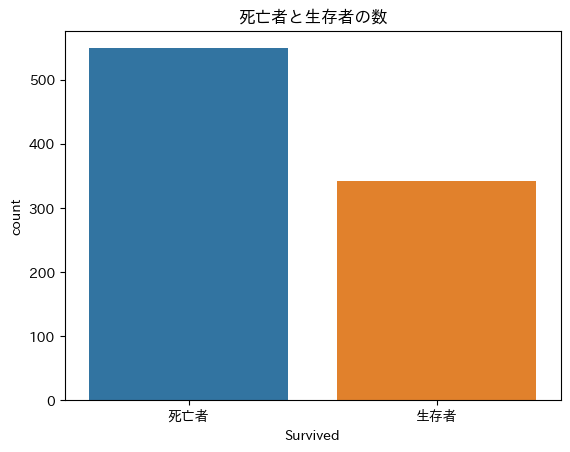

死亡者数と生存者数


Survived
0    549
1    342
Name: count, dtype: int64

死亡者と生存者の割合


Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [21]:
sns.countplot(x='Survived', data=train)
plt.title('死亡者と生存者の数')
plt.xticks([0,1],['死亡者','生存者'])
plt.show()

print('死亡者数と生存者数')
display(train.Survived.value_counts())

print('死亡者と生存者の割合')
display(train.Survived.value_counts() / len(train.Survived))

## 性別

In [22]:
# 下段の図表示でエラーが出るため修正
train.Survived = train.Survived.astype('str')
train.Survived.dtype

dtype('O')

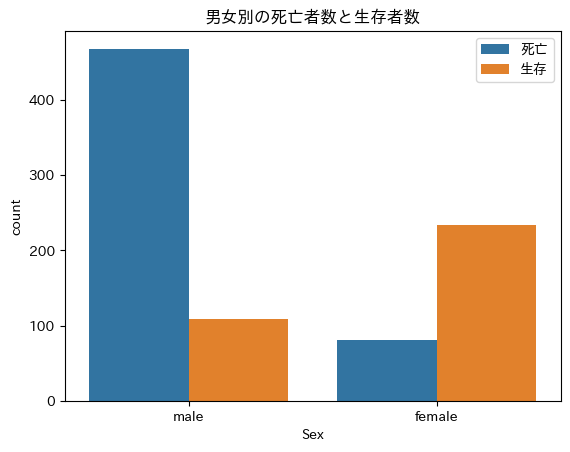

SexとSurvivedのクロス集計


Survived,0,1
Sex,,
female,81,233
male,468,109


クロス集計しSex毎に正規化する


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [23]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('男女別の死亡者数と生存者数')
plt.legend(['死亡','生存'])
plt.show()

print('SexとSurvivedのクロス集計')
display(pd.crosstab(train.Sex, train.Survived))

print('クロス集計しSex毎に正規化する')
display(pd.crosstab(train.Sex, train.Survived, normalize='index'))

## チケットクラス

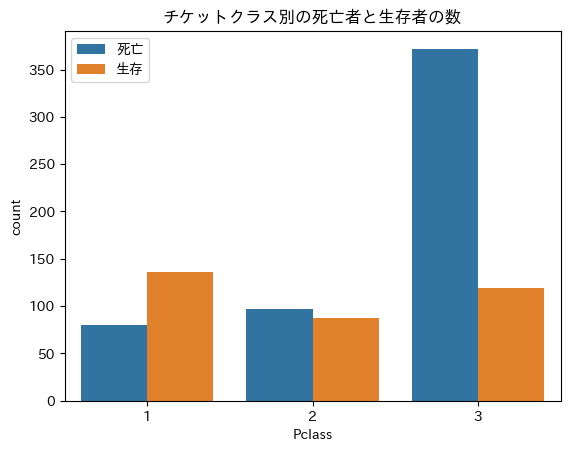

PclassとSurvivedのクロス集計


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


クロス集計しPclass毎に正規化する


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [24]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('チケットクラス別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.show()

print('PclassとSurvivedのクロス集計')
display(pd.crosstab(train.Pclass, train.Survived))

print('クロス集計しPclass毎に正規化する')
display(pd.crosstab(train.Pclass, train.Survived, normalize='index'))

## 年齢の分布

In [25]:
# データ型を戻す
train.Survived = train.Survived.astype('int64')
train.Survived.dtype

dtype('int64')

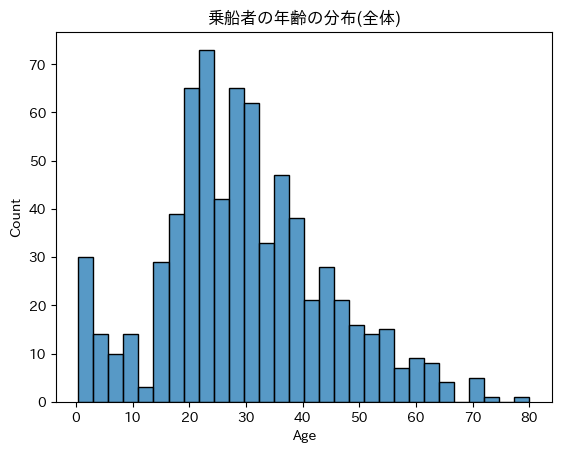

In [26]:
sns.histplot(train.Age.dropna(), kde=False, bins=30, label='全体')
plt.title('乗船者の年齢の分布(全体)')
# plt.legend()
plt.show()

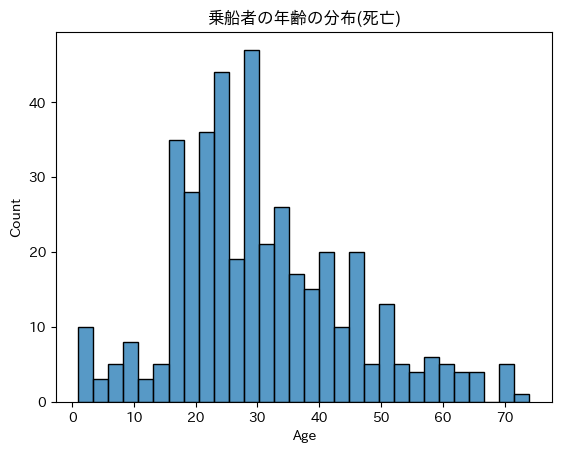

In [27]:
sns.histplot(train[train['Survived']==0].Age.dropna(), kde=False, bins=30, label='死亡')
plt.title('乗船者の年齢の分布(死亡)')
# plt.legend()
plt.show()

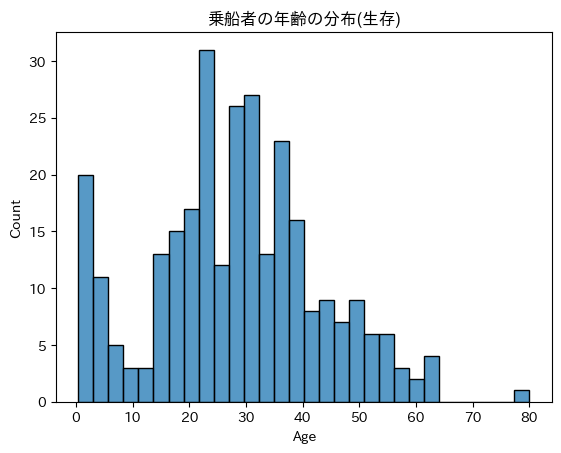

In [28]:
sns.histplot(train[train['Survived']==1].Age.dropna(), kde=False, bins=30, label='死亡')
plt.title('乗船者の年齢の分布(生存)')
# plt.legend()
plt.show()

In [29]:
# 年齢を8等分し、変数を作成
train_array = np.array(train.Age)
train['CategoricalAge'] = pd.cut(train_array,8)
test_array = np.array(test.Age)
test['CategoricalAge'] = pd.cut(test_array,8)

print('CategoricalAgeとSurvivedのクロス集計')
display(pd.crosstab(train.CategoricalAge, train.Survived))

print('クロス集計しCategoricalAge毎に正規化する')
display(pd.crosstab(train.CategoricalAge, train.Survived, normalize='index'))

CategoricalAgeとSurvivedのクロス集計


Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",26,38
"(10.368, 20.315]",71,44
"(20.315, 30.263]",146,84
"(30.263, 40.21]",86,69
"(40.21, 50.158]",53,33
"(50.158, 60.105]",25,17
"(60.105, 70.052]",13,4
"(70.052, 80.0]",4,1


クロス集計しCategoricalAge毎に正規化する


Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",0.406250,0.593750
"(10.368, 20.315]",0.617391,0.382609
"(20.315, 30.263]",0.634783,0.365217
"(30.263, 40.21]",0.554839,0.445161
"(40.21, 50.158]",0.616279,0.383721
"(50.158, 60.105]",0.595238,0.404762
"(60.105, 70.052]",0.764706,0.235294
"(70.052, 80.0]",0.800000,0.200000


## 兄弟・配偶者の数

Text(0.5, 1.0, '同乗している兄弟・配偶者の数')

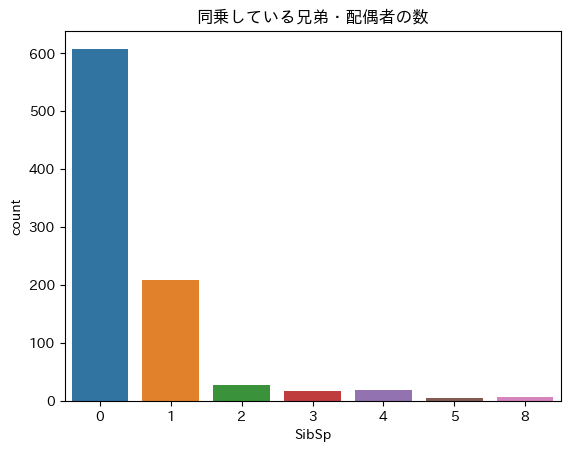

In [30]:
sns.countplot(x='SibSp', data=train)
plt.title('同乗している兄弟・配偶者の数')

In [31]:
# 下段の図表示でエラーが出るため修正
train.Survived = train.Survived.astype('str')
train.Survived.dtype

dtype('O')

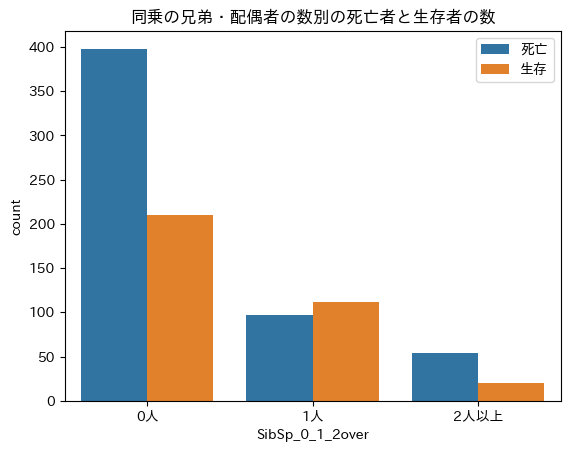

SibSpとSurvivedのクロス集計


Survived,0,1
SibSp_0_1_2over,,
0,398,210
1,97,112
2,54,20


クロス集計しSibSp毎に正規化する


Survived,0,1
SibSp_0_1_2over,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.729730,0.270270


In [32]:
# SibSpが2以上は2に集約
train['SibSp_0_1_2over'] = [i if i <= 1 else 2 for i in train.SibSp]
test['SibSp_0_1_2over'] = [i if i <= 1 else 2 for i in test.SibSp]

sns.countplot(x='SibSp_0_1_2over', hue='Survived', data=train)
plt.legend(['死亡','生存'])
plt.xticks([0,1,2],['0人','1人','2人以上'])
plt.title('同乗の兄弟・配偶者の数別の死亡者と生存者の数')
plt.show()

print('SibSpとSurvivedのクロス集計')
display(pd.crosstab(train['SibSp_0_1_2over'], train.Survived))

print('クロス集計しSibSp毎に正規化する')
display(pd.crosstab(train['SibSp_0_1_2over'], train.Survived, normalize='index'))

## 両親・子供の数

Text(0.5, 1.0, '同乗している両親・子供の数')

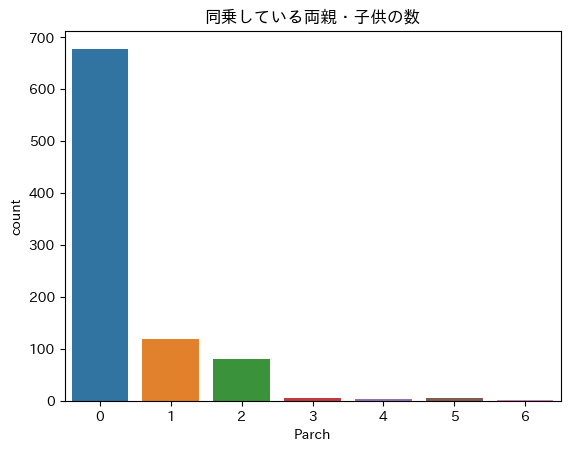

In [33]:
sns.countplot(x='Parch', data=train)
plt.title('同乗している両親・子供の数')

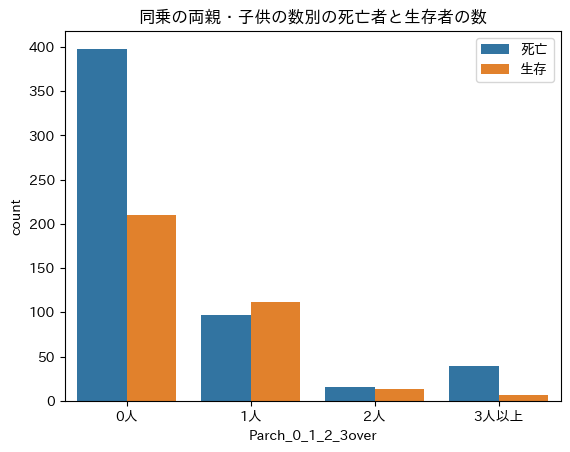

ParchとSurvivedのクロス集計


Survived,0,1
Parch_0_1_2_3over,,
0,398,210
1,97,112
2,15,13
3,39,7


クロス集計しParch毎に正規化する


Survived,0,1
Parch_0_1_2_3over,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.847826,0.152174


In [34]:
# Parchが3以上は2に集約
train['Parch_0_1_2_3over'] = [i if i <= 2 else 3 for i in train.SibSp]
test['Parch_0_1_2_3over'] = [i if i <= 2 else 3 for i in test.SibSp]

sns.countplot(x='Parch_0_1_2_3over', hue='Survived', data=train)
plt.legend(['死亡','生存'])
plt.xticks([0,1,2,3],['0人','1人','2人','3人以上'])
plt.title('同乗の両親・子供の数別の死亡者と生存者の数')
plt.show()

print('ParchとSurvivedのクロス集計')
display(pd.crosstab(train['Parch_0_1_2_3over'], train.Survived))

print('クロス集計しParch毎に正規化する')
display(pd.crosstab(train['Parch_0_1_2_3over'], train.Survived, normalize='index'))

## 1人で乗船か、2人以上で乗船か

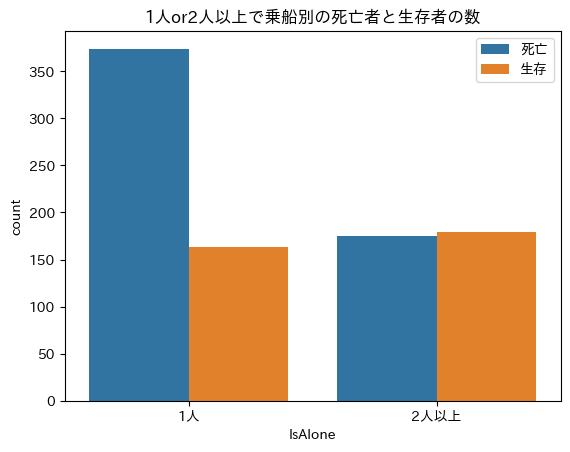

IsAloneとSurvivedのクロス集計


Survived,0,1
IsAlone,,
0,374,163
1,175,179


クロス集計しIsAlone毎に正規化する


Survived,0,1
IsAlone,,
0,0.696462,0.303538
1,0.494350,0.505650


In [35]:
# SibSpとParchが同乗している家族の数。1を足して家族の人数にする
train['FamilySize'] = train.SibSp + train.Parch + 1
test['FamilySize'] = test.SibSp + test.Parch + 1

# IsAloneを0、2行目でFamilySizeが2以上なら1とする
train['IsAlone'] = 0
train.loc[train['FamilySize']>=2, 'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['FamilySize']>=2, 'IsAlone'] = 1

sns.countplot(x='IsAlone', hue='Survived', data=train)
plt.legend(['死亡','生存'])
plt.xticks([0,1],['1人','2人以上'])
plt.title('1人or2人以上で乗船別の死亡者と生存者の数')
plt.show()

print('IsAloneとSurvivedのクロス集計')
display(pd.crosstab(train['IsAlone'], train.Survived))

print('クロス集計しIsAlone毎に正規化する')
display(pd.crosstab(train['IsAlone'], train.Survived, normalize='index'))

## 運賃の分布

In [36]:
# データ型を戻す
train.Survived = train.Survived.astype('int64')
train.Survived.dtype

dtype('int64')

Text(0.5, 1.0, '運賃の分布')

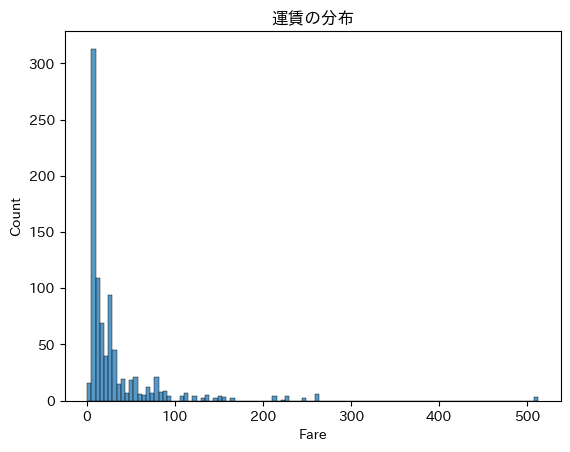

In [37]:
sns.histplot(train.Fare.dropna(), kde=False)
plt.title('運賃の分布')

In [38]:
train_array2 = np.array(train.Fare)
train['CategoricalFare'] = pd.qcut(train_array2, 4)
train[['CategoricalFare','Survived']].groupby(['CategoricalFare'], as_index=False).mean()

print('CategoricalFareとSurvivedのクロス集計')
display(pd.crosstab(train['CategoricalFare'], train.Survived))

print('クロス集計しCategoricalFare毎に正規化する')
display(pd.crosstab(train['CategoricalFare'], train.Survived, normalize='index'))

CategoricalFareとSurvivedのクロス集計


Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",179,44
"(7.91, 14.454]",156,68
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129


クロス集計しCategoricalFare毎に正規化する


Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",0.802691,0.197309
"(7.91, 14.454]",0.696429,0.303571
"(14.454, 31.0]",0.545045,0.454955
"(31.0, 512.329]",0.418919,0.581081


## 名前

In [39]:
train['Name'][:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [40]:
# 敬称を抽出し、重複を省く
set(train.Name.str.extract('([A-Za-z]+)\.', expand=False))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [41]:
# 敬称をカウントする
train.Name.str.extract('([A-Za-z]+)\.', expand=False).value_counts()

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [42]:
# 年齢の平均値
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand=False)
train.groupby('Title')['Age'].mean()

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [43]:
# 変換用の関数を作成
def title_to_num(title):
    if title == 'Master':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mr':
        return 3
    elif title == 'Mrs':
        return 4
    else:
        return 5

In [44]:
# testにも同様の処理
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [45]:
# 変換
train['Title_num'] = [title_to_num(i) for i in train['Title']]
test['Title_num'] = [title_to_num(i) for i in test['Title']]

In [46]:
# 性別をカテゴリー変換
for i,s in enumerate(train['Sex']):
    if s =='male':
        train.loc[i,'SexC'] = 0
    elif s == 'female':
        train.loc[i,'SexC'] = 1

for i,s in enumerate(test['Sex']):
    if s =='male':
        test.loc[i,'SexC'] = 0
    elif s == 'female':
        test.loc[i,'SexC'] = 1

# 加工したデータを出力

In [47]:
train.to_csv(r"./datasets_nb001/nb001_train.csv", encoding='utf-8')
test.to_csv(r"./datasets_nb001/nb001_test.csv", encoding='utf-8')